# ORBIT HOMEWORK

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian
N = UNITS.newton

<Unit('newton')>

In [3]:
r_e = 147e9 * m
r_j = 778e9 * m
init_jupiter_mass = 1.898e27 * kg

init = State(x_e = r_e, y_e = 0 * m, vx_e = 0 *m/s, vy_e = -29784 *m/s,
             x_s = 0 * m, y_s = 0 * m, vx_s = 0 *m/s, vy_s = 0 *m/s,
             x_j = r_j, y_j = 0 * m, vx_j = 0 *m/s, vy_j = -13069 *m/s, m_j = init_jupiter_mass)

,values
x_e,147000000000.0 meter
y_e,0 meter
vx_e,0.0 meter / second
vy_e,-29784.0 meter / second
x_s,0 meter
y_s,0 meter
vx_s,0.0 meter / second
vy_s,0.0 meter / second
x_j,778000000000.0 meter
y_j,0 meter


In [31]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m_s=1.989e30 * kg, 
                r_final=r_sun + r_earth,
                m_e=5.972e24 * kg,
                t_0=0 * s,
                t_end=378432000*2 * s)

,values
init,x_e 147000000000.0 meter y_e ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m_s,1.989e+30 kilogram
r_final,701879000.0 meter
m_e,5.972e+24 kilogram
t_0,0 second
t_end,756864000 second


In [32]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x_e, y_e, vx_e, vy_e, x_s, y_s, vx_s, vy_s, x_j, y_j, vx_j, vy_j, m_j = state
    unpack(system)
    
    
    cur_position_se = Vector(x_s - x_e, y_s - y_e)
    mag_se = cur_position_se.mag
    
    force_se = G * m_s * m_e / mag_se**2
    direction_se = -cur_position_se.hat()
    
    se_force = direction_se * force_se
    
    
    
    cur_position_sj = Vector(x_s - x_j, y_s - y_j)
    mag_sj = cur_position_sj.mag
    
    force_sj = G * m_s * m_j / mag_sj**2
    direction_sj = -cur_position_sj.hat()
    
    sj_force = direction_sj * force_sj
    
    
    
    cur_position_je = Vector(x_j - x_e, y_j - y_e)
    mag_je = cur_position_je.mag
    
    force_je = G * m_j * m_e / mag_je**2
    direction_je = -cur_position_je.hat()
    
    je_force = direction_je * force_je
    
    
    return je_force, sj_force, se_force

In [33]:
force = universal_gravitation(init,system)

(<Quantity([-1.89995577e+18 -0.00000000e+00], 'newton')>,
 <Quantity([ 4.16253597e+23 -0.00000000e+00], 'newton')>,
 <Quantity([ 3.6686486e+22 -0.0000000e+00], 'newton')>)

In [34]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x_e, y_e, vx_e, vy_e, x_s, y_s, vx_s, vy_s, x_j, y_j, vx_j, vy_j, m_j = state
    unpack(system)    

    je_force, sj_force, se_force = universal_gravitation(state, system)
    dx_edt = vx_e
    dy_edt = vy_e
    dvx_edt = (-je_force.x / m_e) + (-se_force.x / m_e)
    dvy_edt = (-je_force.y / m_e) + (-se_force.y / m_e)
    
    dx_jdt = vx_j
    dy_jdt = vy_j
    dvx_jdt = (je_force.x / m_j) + (-sj_force.x / m_j)
    dvy_jdt = (je_force.y / m_j) + (-sj_force.y / m_j)
    
    dx_sdt = vx_s
    dy_sdt = vy_s
    dvx_sdt = (se_force.x / m_s) + (sj_force.x / m_s)
    dvy_sdt = (se_force.y / m_s) + (sj_force.y / m_s)
    
    dm_jdt = 0
    
    return dx_edt, dy_edt, dvx_edt, dvy_edt, dx_jdt, dy_jdt, dvx_jdt, dvy_jdt, dx_sdt, dy_sdt, dvx_sdt, dvy_sdt, dm_jdt

In [35]:
# Always test the slope function!

slope_func(init, 50000, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(-29784.0, 'meter / second')>,
 <Quantity(-0.0061427639051793, 'newton / kilogram')>,
 <Quantity(0.0, 'newton / kilogram')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-13069.0, 'meter / second')>,
 <Quantity(-0.0002193126960364181, 'newton / kilogram')>,
 <Quantity(0.0, 'newton / kilogram')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(2.277225153940937e-07, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>,
 0)

In [36]:
#def event_func(state, t, system):
#    x,y,vx,vy = state
#    if t>1:
#        return r_0 + x
#    else:
#        return 1

In [37]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,10826
njev,0
nlu,0
status,-1
message,Required step size is less than spacing betwee...
success,False


In [38]:
results

,x_e,y_e,vx_e,vy_e,x_s,y_s,vx_s,vy_s,x_j,y_j,vx_j,vy_j,m_j
0.000000e+00,1.470000e+11,0.000000e+00,0.000000e+00,-2.978400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.780000e+11,0.000000e+00,0.000000e+00,-13069.000000,1.898000e+27
6.874889e-08,1.470000e+11,-2.047617e-03,-4.223300e-10,-2.978400e+04,4.408314e-23,-8.984792e-04,-1.507750e-11,-8.706257e-27,7.780000e+11,-1.995152e-34,1.282439e-15,-13069.000000,1.898000e+27
7.562378e-07,1.470000e+11,-2.252379e-02,-4.645630e-09,-2.978400e+04,5.334060e-21,-9.883271e-03,-1.658525e-10,-1.053457e-24,7.780000e+11,-2.655547e-31,1.410683e-14,-13069.000000,1.898000e+27
7.631127e-06,1.470000e+11,-2.272855e-01,-4.687863e-08,-2.978400e+04,5.431484e-19,-9.973119e-02,-1.673603e-09,-1.072698e-22,7.780000e+11,-2.728631e-28,1.423508e-13,-13069.000000,1.898000e+27
7.638001e-05,1.470000e+11,-2.274902e+00,-4.692087e-07,-2.978400e+04,5.441275e-17,-9.982104e-01,-1.675111e-08,-1.074632e-20,7.780000e+11,-2.736013e-25,1.424790e-12,-13069.000000,1.898000e+27
7.638689e-04,1.470000e+11,-2.275107e+01,-4.692509e-06,-2.978400e+04,5.442255e-15,-9.983003e+00,-1.675261e-07,-1.074825e-18,7.780000e+11,-2.736751e-22,1.424918e-11,-13069.000000,1.898000e+27
7.638758e-03,1.470000e+11,-2.275128e+02,-4.692551e-05,-2.978400e+04,5.442352e-13,-9.983092e+01,-1.675277e-06,-1.074844e-16,7.780000e+11,-2.736825e-19,1.424931e-10,-13069.000000,1.898000e+27
7.638765e-02,1.470000e+11,-2.275130e+03,-4.692556e-04,-2.978400e+04,5.442362e-11,-9.983101e+02,-1.675278e-05,-1.074846e-14,7.780000e+11,-2.736833e-16,1.424933e-09,-13069.000000,1.898000e+27
7.638765e-01,1.470000e+11,-2.275130e+04,-4.692556e-03,-2.978400e+04,5.442363e-09,-9.983102e+03,-1.675278e-04,-1.074847e-12,7.780000e+11,-2.736833e-13,1.424933e-08,-13069.000000,1.898000e+27
7.638765e+00,1.470000e+11,-2.275130e+05,-4.692556e-02,-2.978400e+04,5.442363e-07,-9.983102e+04,-1.675278e-03,-1.074847e-10,7.780000e+11,-2.736833e-10,1.424933e-07,-13069.000000,1.898000e+27


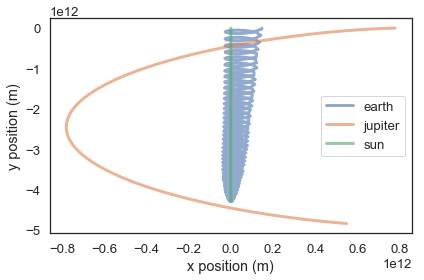

In [39]:
def plot_trajectory(results):
    plot(results.x_e, results.y_e, label='earth')
    plot(results.x_j, results.y_j, label='jupiter')
    plot(results.x_s, results.y_s, label='sun')

    
    decorate(xlabel='x position (m)',
             ylabel='y position (m)')

plot_trajectory(results)
#savefig('figs/chap10-fig02.pdf')